# Comparison

Now that we have attained the four models trained on the training set, we now compare the performance of these models on the test set. First we import some necessary libraries.

In [1]:
import os
import pandas as pd
import random
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

Each model has a list of predictions for the test set where they give their respective probabilities of a case having heart disease based on given information for the other features. We read each list of probabilities in and store them in an array.

In [2]:
LR_df = pd.read_csv("LogRegProb.csv")
BDT_df = pd.read_csv("BDTProb.csv")
KNN_df = pd.read_csv("KNNProb.csv")
lin_df = pd.read_csv("LinearRegProb.csv")

test_df = pd.read_csv("imputed_test_90_10.csv")

In [3]:
LR = LR_df['Probabilities']
BDT = BDT_df['Probability of Heart Disease']
KNN = KNN_df['0']
lin = lin_df['Probabilities']

test = test_df['HeartDiseaseorAttack']

We now take the probabilities produced by the models and produce ROC curves based on these values and the true values stored in "test". ROC curves show how the true positive rate (TPR) and the false positive rate (FPR) change as the sensitivity rate is changed.

A perfect model would have 100% TPR and 0% FPR which corresponds with the curve lying in the upper-left corner of the graph. Therefore, the more a curve tends to the upper-left corner, the better the model predictions.

Here, we generate the points for the ROC curves using the "roc_curve" function in the sk-learn "metrics" package.

In [4]:
from sklearn.metrics import roc_curve
LR_fpr, LR_tpr, _ = roc_curve(test, LR)
BDT_fpr, BDT_tpr, _ = roc_curve(test, BDT)
KNN_fpr, KNN_tpr, _ = roc_curve(test, KNN)
lin_fpr, lin_tpr, _ = roc_curve(test, lin)

We now plot all of the ROC curves on the same graph. We also add a control curve which represents the performance of a truly random model (where both a positive and negative result are given a probability of 0.5).

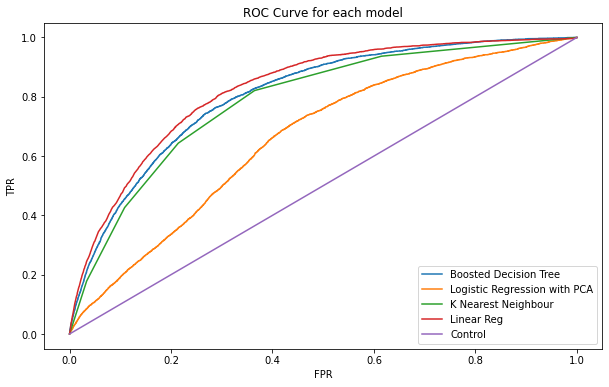

In [5]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(BDT_fpr, BDT_tpr, label='Boosted Decision Tree')
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression with PCA')
plt.plot(KNN_fpr, KNN_tpr, label='K Nearest Neighbour')
plt.plot(lin_fpr, lin_tpr, label='Linear Reg')

plt.plot(x,y,label='Control')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

We can visually see that all of the models have performed better than the control, with 3 of the models (boosted decision tree, K nearest neighbour and linear regression) performing similarly and the logistic regression with PCA model following closely behind.

We look at the AUC (Area Under the Curve) score for each curve to get a numerical answer to which model performed the best, after having made our visual observations. We can say that the larger the AUC, the better the model predictions.

In [6]:
from sklearn.metrics import roc_auc_score
print("AUC Scores:")
print("Linear Regression: " + str(roc_auc_score(test, lin)))
print("Boosted Decision Tree: " + str(roc_auc_score(test, BDT)))
print("K Nearest Neighbour: " + str(roc_auc_score(test, KNN)))
print("Logistic Regression with PCA: " + str(roc_auc_score(test, LR)))

AUC Scores:
Linear Regression: 0.8261057507747035
Boosted Decision Tree: 0.8057904028769552
K Nearest Neighbour: 0.7851794239506134
Logistic Regression with PCA: 0.6604129668170541


Therefore, linear regression has performed the best, closely followed by the boosted decision tree and K nearest neighbour models, with the logistic regression with PCA model having the lowest AUC score.

This unexpected result could be explained by...???????????